# **Weather Forecasting Project - Part 2**

**Statistical Models for Data Science**

**Marco Colognesi - VR495478**

## **Forecasting Models**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
sns.set_theme()

### **Multiple Linear Regression**

First forecasting model is the multiple linear regression

In [34]:
# Importing train dataset
train_data = pd.read_csv(
    filepath_or_buffer="cleaned_data/train_clean.csv",
    parse_dates=['date'],
    index_col=['date'],
)

# Imposing data frequency as daily
train_data = train_data.asfreq('D')

# Lowercase column names
train_data.columns = train_data.columns.str.lower()

display(train_data)

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013-01,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013-01,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013-01,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013-01,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013-01,2013
...,...,...,...,...,...,...
2016-12-27,16.850000,67.550000,8.335000,1017.200000,2016-12,2016
2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016-12,2016
2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016-12,2016


In [35]:
# Importing test data
test_data = pd.read_csv(
    filepath_or_buffer="cleaned_data/test_clean.csv",
    parse_dates=['date'],
    index_col=['date']
)

# Imposing frequency
test_data = test_data.asfreq('D')

# Lowercase column names
test_data.columns = test_data.columns.str.lower()

display(test_data)

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2017-01-01,15.913043,85.869565,2.743478,1018.277778,2017-01,2017
2017-01-02,18.500000,77.222222,2.894444,1018.277778,2017-01,2017
2017-01-03,17.111111,81.888889,4.016667,1018.333333,2017-01,2017
2017-01-04,18.700000,70.050000,4.545000,1015.700000,2017-01,2017
2017-01-05,18.388889,74.944444,3.300000,1014.333333,2017-01,2017
...,...,...,...,...,...,...
2017-03-27,29.500000,38.625000,13.650000,1009.500000,2017-03,2017
2017-03-28,29.888889,40.666667,8.844444,1009.000000,2017-03,2017
2017-03-29,31.000000,34.500000,13.200000,1007.125000,2017-03,2017


                            OLS Regression Results                            
Dep. Variable:               meantemp   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     3113.
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:06:28   Log-Likelihood:                -3521.6
No. Observations:                1461   AIC:                             7051.
Df Residuals:                    1457   BIC:                             7072.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          820.0381     10.416     78.728   

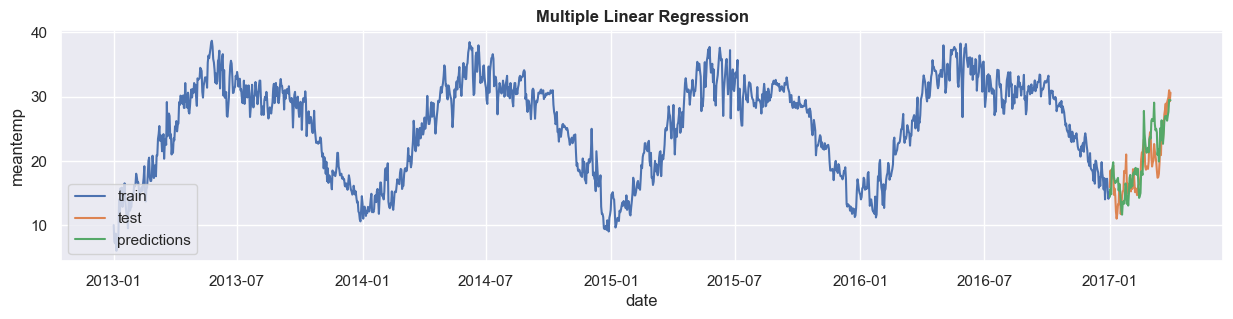

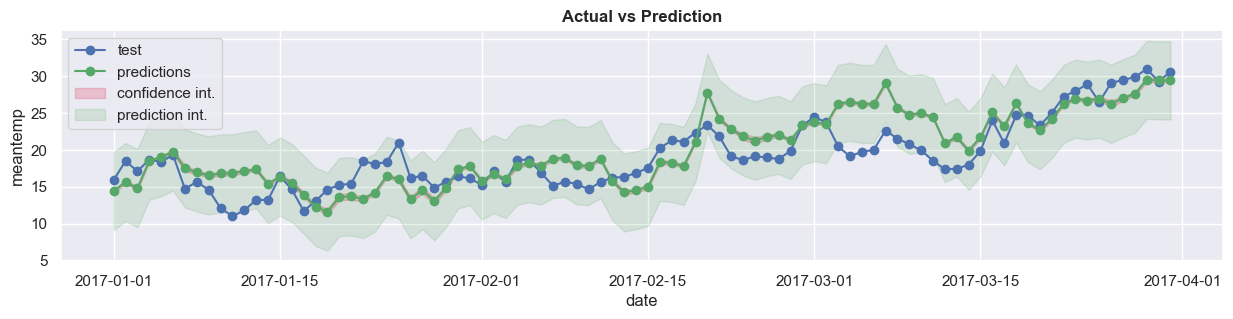

Evaluation on test set: 
R2: 0.59072716208202
RMSE: 8.8947529095909
MAE: 2.4309679154425345


In [36]:
# Multiple linear regression using "humidity", "wind_speed", "meanpressure"

# Training dataset
X_train = train_data[['humidity', 'wind_speed', 'meanpressure']]
y_train = train_data['meantemp']

# Testing dataset
X_test = test_data[['humidity', 'wind_speed', 'meanpressure']]
y_test = test_data['meantemp']

# Fitting the model
X_train = sm.add_constant(X_train)  # in statsmodels we need to manually add constant otherwise b=0
reg = sm.OLS(y_train, X_train).fit()

# Printing regression summary
print(reg.summary())

# Making predictions on test data
X_test = sm.add_constant(X_test)
df_predictions = reg.get_prediction(X_test).summary_frame(alpha=0.05)
preds = df_predictions['mean'].values

# Plotting predictions vs actual values
plt.figure(figsize=(15,3))
plt.title(f"Multiple Linear Regression", weight="bold")
plt.plot(train_data.index, y_train, label='train')
plt.plot(test_data.index, y_test, label='test')
plt.plot(test_data.index, preds, label='predictions')
plt.xlabel('date')
plt.ylabel('meantemp')
plt.legend(loc='lower left')
plt.show()

# Plotting predictions vs actual values
plt.figure(figsize=(15,3))
plt.title(f"Actual vs Prediction", weight="bold")
plt.plot(test_data.index, y_test, 'o-' ,label='test')
plt.plot(test_data.index, preds, 'go-', label='predictions')
plt.fill_between(test_data.index, df_predictions.mean_ci_lower, df_predictions.mean_ci_upper, alpha=.2, color='crimson', label = 'confidence int.')
plt.fill_between(test_data.index, df_predictions.obs_ci_lower, df_predictions.obs_ci_upper, alpha=.1, color='green',label='prediction int.')
plt.xlabel('date')
plt.ylabel('meantemp')
plt.legend(loc='best')
plt.show()

r2_test = r2_score(y_test, preds)
rmse = mean_squared_error(y_test, preds, squared=True)
mae = mean_absolute_error(y_test, preds)

print(f"=============================")
print(f"Evaluation on test set: \nR2: {r2_test}\nRMSE: {rmse}\nMAE: {mae}")

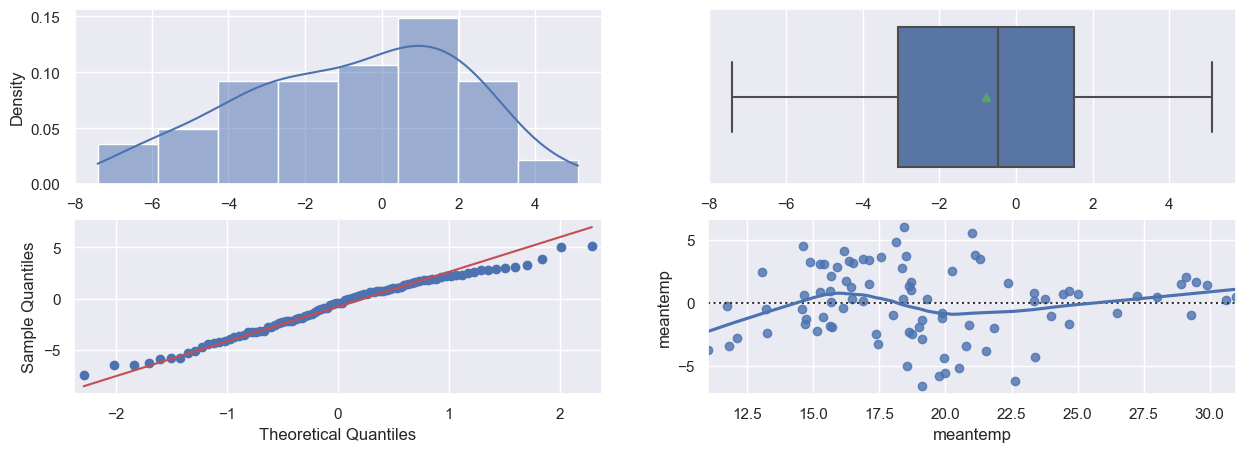

In [37]:
# Calculating residuals
residuals = y_test - preds

# plotting residuals visualization
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,5))
# histogram and boxplot to see distribution
sns.histplot(residuals, kde=True, stat='density', ax=ax[0,0])
sns.boxplot(x=residuals, ax=ax[0,1], showmeans=True)
# qq-plot 
sm.qqplot(residuals, line='q', ax=ax[1,0])
# residplot
sns.residplot(y=residuals, x=y_test, lowess=True, ax=ax[1,1])
plt.show()

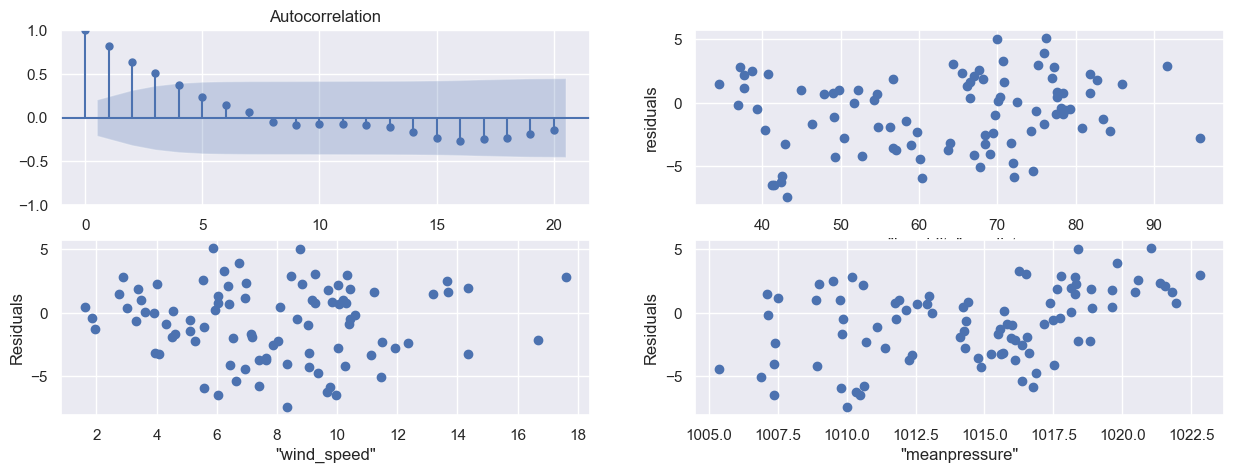

In [38]:
fig, ax = plt.subplots(2,2,figsize=(15,5))
plot_acf(residuals, ax=ax[0,0])

ax[0,1].scatter(test_data['humidity'],residuals)
ax[0,1].set_xlabel('"humidity" predictor')
ax[0,1].set_ylabel('residuals')

ax[1,0].scatter(test_data['wind_speed'],residuals)
ax[1,0].set_xlabel('"wind_speed"')
ax[1,0].set_ylabel('Residuals')

ax[1,1].scatter(test_data['meanpressure'],residuals)
ax[1,1].set_xlabel('"meanpressure"')
ax[1,1].set_ylabel('Residuals')
plt.show()

Let's see if the model can be improved with date information

In [4]:
# Adding variables representing date information 
train_data['timepoint'] = [x+1 for x in range(len(train_data))]
train_data['month'] = train_data.index.month
train_data['day_of_year'] = train_data.index.day_of_year
train_data['year'] = train_data.index.year

display(train_data)

,meantemp,humidity,wind_speed,meanpressure,month,year,timepoint,day_of_year
date,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013,1,1
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013,2,2
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013,3,3
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013,4,4
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013,5,5
...,...,...,...,...,...,...,...,...
2016-12-27,16.850000,67.550000,8.335000,1017.200000,12,2016,1457,362
2016-12-28,17.217391,68.043478,3.547826,1015.565217,12,2016,1458,363
2016-12-29,15.238095,87.857143,6.000000,1016.904762,12,2016,1459,364
